# CSC413 Assignment 2: American Sign Language

**Deadline**: March 4, 2022 by 10pm

**Submission**: Compile and submit a PDF report containing your code, outputs,
and your written solutions. Do not use screenshots and images to present
textual code/output (other than legible, hand-written answer).
You may export the completed notebook on Google Colab, but if you do so
**it is your responsibly to make sure that your code and answers do not get cut off**.

**Late Submission**: Please see the syllabus for the late submission criteria.

**Working with a partner**: You may work with a partner for this assignment.
If you decide to work with a partner, please create your group on Markus by
the deadline, even if you intend to use grace tokens. Markus does not allow
you to create groups past the deadline, even if you have grace tokens remaining.

[American Sign Language (ASL)](https://en.wikipedia.org/wiki/American_Sign_Language)
is a complete, complex language that employs signs made by 
moving the hands combined with facial expressions and postures of the body. 
It is the primary language of many North Americans who are deaf and is one of several 
communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabets are shown below.

In this assignment, we will 
classify a subset of these hand gesture images using convolutional neural networks.
Specifically, given an image of a hand showing one of the letters A-I, we want to detect
which letter is being represented.

We will explore several convolutional architectures.
While we will give you a tiny
big of starter code to help make data processing a bit easier,
you'll have a chance to build your neural network all by yourself!

You may modify the starter code as you see fit, including changing the signatures of
functions and adding/removing helper functions. However, please make sure that your
TA can understand what you are doing and why.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models, torchvision.datasets

%matplotlib inline

## Question 1. Data

If you are using your own machine, download the data from the course website on Quercus.

If you are using Google Colab, download the data set to your Google Drive by going to
the link [https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing](https://drive.google.com/drive/folders/1aPL24P610NHLvt9exk6-B7SzGk3R8Q48?usp=sharing)
and selecting "Add to My Drive".
This is faster than downloading the data from the course website.

Then, mount Google Drive from your Google Colab notebook:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The file structure we use is intentional,
so that we can use `torchvision.datasets.ImageFolder`
to help load our data and create labels.

In [3]:
train_path = "/content/gdrive/My Drive/CSC413/asl_data/train/" # edit me
valid_path = "/content/gdrive/My Drive/CSC413/asl_data/valid/" # edit me
test_path = "/content/gdrive/My Drive/CSC413/asl_data/test/"   # edit me

train_data = torchvision.datasets.ImageFolder(train_path, transform=torchvision.transforms.ToTensor())
valid_data = torchvision.datasets.ImageFolder(valid_path, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(test_path, transform=torchvision.transforms.ToTensor())

### Part (a) -- 2 pts

Read up on what `torchvision.datasets.ImageFolder` does for us here
[https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder](https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder)

We can iterate through the one training data point at a time like this:

In [4]:
for x, y in train_data:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([3, 224, 224])
0


What do the variables `x` and `y` contain? What is the shape of our images?
What are our labels? How did PyTorch generate these labels from the folder structure?

Before answering this question, you will need to look at the folder structure
and look at some images in the data set.

In [6]:
# This for-loop runs 733 times which is exactly the amount of pictures in the training data. 
# The variable x contains the shape of an image and y is the number of the folder (letter) in which the image belongs to. 
# In other words, the variable y is the target value. The PyTorch generates these labels by turning each image into tensor image. 
# The size of x is a list [a,b,c] where 'a' represents the number of channels (number of features(students)), 'b' is the image height, and 'c' is the image width. 
# Therefore, x is the input image and y is the predicted output.

### Part (b) -- 2 pts

We saw in the earlier tutorials that PyTorch has a utility to help us
create minibatches with our data. We can use the same DataLoader helper
here:

In [5]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)

for x, y in train_loader:
    print(x.shape)
    print(y)
    break # uncomment if you'd like

torch.Size([10, 3, 224, 224])
tensor([6, 0, 7, 4, 7, 3, 3, 7, 2, 6])


What do the variables `x` and `y` contain? What are their shapes?
What data do they contain?

In [7]:
# # Over here x contains the shape of the image which is a list of 4 elements [a,b,c,d] where 'a' is the batch 
# size of images (in our case it's 10), 'b' is the channel of the image, 'c' is the height of the image, and 'd' 
# is the width of the image. Additionally, the variable y represents the targets values, thus, the folder in which 
# each image in the batch belongs to.

### Part (c) -- 1 pts

How many images are there in the training, validation, and test sets?

In [8]:
# There are a total of 1163 images in which 733 are in the training set, 207 are in the validation set, and 223 are in the test set.

### Part (d) -- 3 pts

This dataset was generated by students in past machine learning courses, where
each student took several photos of themselves demonstrating the ASL hand gestures.
The file names of the images follow the following convention:
`<student-identifier>_<letter>_<img-count>.jpg`

When we split the data into training, validation, and test sets, we took care
to put photos taken by the same person in the same data set. In other words, if one of the
student's photo is in the training set, then other photos taken by the same student
will also be placed in the training set.

This way of separating the dataset into training, validation and test is more nuanced
than simply randomly splitting the photos into training/validation/test.

Explain why it is important to make sure that we split the photos into the
three datasets **by student**, so that photos from the same student are always in the
same set.

In [9]:
# The training set is used to determine the value of the parameters such that the model fits well with this set (training accuracy).
# However, it is not a good predictor on how well this model will perform on new data (regardless of what training set is supplied).
# Thus, we need to set aside a test set. The purpose of the test set is to determine how well the model will perform on new data by example.
# On the other hand, even though the test set can help up with unseen data, it is still not a sufficient measure to decide on which model to deploy.
# For that, we need to set aside a validation set, which is used to make decision about models that are not continuous and cannot be optimized by gradient descent.
# The validation is used to optimize hyperparameters, since variations of the models depend on manually adjusting hyperparameters.

# If we use the test set to determine which model to deploy, then we will overestimate how well our model will perform on new data (aka new student's hands).
# Even given a good training accuracy, it is possible that our model will underperform due to poor generalization (high generalization error)

# It is important to split the photos into three datasets by student, such that photos from the same student must be in the same set.
# This is because each student makes their own differing contribution to the total dataset, and each contribution is their set of images. 
# The student effectively makes one contribution to the sample set, and thus can only belong in one category.

## Question 2. Model Building

#### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts
the letter. Your model should be a subclass of `nn.Module`. 
You may want to review the Colab notebook demo from week 6 lectures. There is a small convolutional
neural network included in the notebook.

Here are some rules of thumb when determining your convolutional neural network architecture:

- Nowadays, people prefer small kernel sizes (e.g. 3x3 or 5x5), with many convolutional layers
  (we suggest 3-4 to start).
- Use a downsampling operation after (or with) each convolution layer
- In a typical convolutional neural network architectures, every time we downsample, we double the
  number of features (channels). This is so that we don't lose too much information in each layer.
  You may wish to make the number of output channels in your first convolutional layer a variable,
  and double this value in every subsequent convolutions.
- Typical CNNS will have a few (1-3) fully-connected layers as the final layers.

Explain your choice of neural network architecture: how many layers did you choose?
What types of layers did you use? Were they fully-connected or convolutional? What about other
decisions like pooling layers, activation functions, number of channels / hidden units.

Do not use dropout or batch normalization in this architecture.

In [5]:
from torch.nn.modules import padding
from torch.nn.modules.conv import Conv2d
import torch.nn.functional as F
import torch.nn.functional as NF

# First Convolutional Network
xshape = train_data[0][0].shape

class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        # Each covolution will be zero-padded, the groups will be 1, and the bias will be true.
        v = 13
        w = [5,3]
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=v, kernel_size=w[0], stride=1, padding=(w[0]//2))
        self.conv2 = nn.Conv2d(in_channels=v, out_channels=v*2, kernel_size=w[1], stride=1, padding=(w[1]//2))

        self.linear1 = nn.Linear(xshape[1]*xshape[2]*v*2//(2**2)//(2**2), 9, bias=True)

    def forward(self, x):
        x = NF.max_pool2d(NF.relu(self.conv1(x)), 2)
        x = NF.max_pool2d(NF.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        return self.linear1(x)

In [15]:
# This network has two convolutional layers: conv1 and conv2
# The first convolutional layers requires an input of 3 (channel in our image), output of 13 channels, kernel size of 5x5.
# We also add 1 stride and 2.5 zero padding which are both downsampling the input. 
# After examining the images in the training set, we noticed that there were different angles for different images.
# Due to the different angles, we added stride since this helps with the movement over the image.
# We added padding to allow more space for the kernel to cover the picture.
# This is also because each picture has a different light setting.
# For this it is important to keep in to take account for all edges, which zero padding helps with.
# The second convolutional layer requires an input of 13 channels, outputs 26 channels, kernel size of 3x3.
# we also added 1 stride and 1.5 zero padding.
# In total we had 7 layers including the pooling layers and the RELU layers.
# We used the pooling operation since it reduces the height and width of the neurons in each layer by half.
# We chose the output channels and zero padding with these numbers because they are what gave us a good model after tweaking the values.
# Moreover, the linear layer takes in 326,111 features and outputs 9.
# Also, as the number of channela grew in the convolutional layer, the number of hidden units in each layer reduced due to the pooling operations.
# The hidden units follow: 
# Initial Image: 3*224*224 = 150,528
# After conv1: 13*224*224 = 652,288
# After Pooling: 13*112*112 = 163,072
# After conv2: 26*112*112 = 326,114
# After Pooling: 26*56*56 = 81,536
# After the linear layer: 9

#### Part (b) Convolutional Network with Batch Normalization - 3 pt

Build a variation of your convolutional neural network from part (a), and 
add either at least one batch normalization *or* at least one dropout layer,
but **not** both.
You will need to read the PyTorch documentation to figure out how these layers
function.

In [6]:
class SecondConvolutionalNet(nn.Module):
    def __init__(self):
        super(SecondConvolutionalNet, self).__init__()
        # Each covolution will be zero-padded, the groups will be 1, and the bias will be true.
        v = 13
        w = [5,3]
        self.bn = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=v, kernel_size=w[0], stride=1, padding=(w[0]//2))
        self.conv2 = nn.Conv2d(in_channels=v, out_channels=v*2, kernel_size=w[1], stride=1, padding=(w[1]//2))
        self.linear1 = nn.Linear(xshape[1]*xshape[2]*v*2//(2**2)//(2**2), 9, bias=True)

    def forward(self, x):
        x = self.bn(x)   # batch normalization
        x = NF.max_pool2d(NF.relu(self.conv1(x)), 2)
        x = NF.max_pool2d(NF.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        return self.linear1(x)

#### Part (c) Architecture Decision - 1 pt

It does not make sense to add the batch normalization or dropout layer as
your *final* layer. Explain why this is the case.

In [13]:
# The final layer is usually to tranform your final layer in to your outputs and get the desired shape for the output. 
# By adding a batch normalization you are essentially doing additional transformation that may cause a issue in your final layer
# Final layer should mostly be for activation functions to make sure we have the desired output

## Question 3. Training Code and Sanity Checking

#### Part (a) Accuracy - 3 pt

Compute the `get_accuracy` function, which computes the model accuracy across a dataset:

In [69]:
def get_accuracy(model, data):
    # note: why should we use a larger batch size here?
        # So that the accuracy is not too high and that we avoid the lower generalization and the affect of regularzing effect.

    loader = torch.utils.data.DataLoader(data, batch_size=256)
    model.eval() # annotate model for evaluation (why do we need to do this?)
    correct = 0
    total = 0

    for imgs, labels in loader:
        output = model(imgs)
        preds = output.max(1, keepdim=True)[1]
        total = total + imgs.shape[0]
        correct = correct + preds.eq(labels.view_as(preds)).sum().item()

    return correct/total # return the model accuracy

#### Part (b) Training Code - 8 pt

Write code to train your neural network given some training data. Your training code
should make it easy to tweak hyperparameters. Make sure that you are checkpointing
your models from time to time (the frequency is up to you). 

Here's what we will be looking for:

- using the data loader to load the training data
- using the correct choice of loss function and a reasonable optimizer
- shuffling the training data at the start of each epoch
- in each iteration, take `batch_size` samples from the data set
- use the correct labels from the data set
- computing the forward and backward passes
- after every epoch, **checkpoint your model** (A1 had instructions and examples for how to do this)
- after every epoch, report the accuracies for the training set and validation set
- track the training curve information and **plot the training curve**
- correctly handling edge cases (e.g. why might the last batch be smaller than the rest?)

Don't forget the checkpointing step. You will need to load your model weights later.

In [8]:
def train(model, train_data, valid_data, batch_size=32, weight_decay=0.0, learning_rate=0.001, num_epochs=7, shuffle=True, printinterval=8):
  # Load the training data
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=shuffle)

    # Track learning curve progress
    epoches, losses, train_acc, valid_acc = [], [], [], [] 

    for epoch in range(num_epochs):
        print('\tEpoch {0:d}'.format(epoch + 1))

        criterion = nn.CrossEntropyLoss() # Loss Function
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # Optimizer
        running_loss = 0.0

        for k, data in enumerate(trainloader, 0):
            # Perform step
            x, t = data # images, labels

            model.train() # annotate model for training
            y = model(x)
            loss = criterion(y, t)

            loss.backward(retain_graph=True)
            optimizer.step()
            optimizer.zero_grad()
            
            running_loss += loss.item() # accumulate the total cost

            # Checkpoint
            printinterval = 8
            if k % printinterval == printinterval - 1:    # print every 2000 mini-batches
                print(f'\t[{epoch + 1}, {k + 1:5d}] loss: {running_loss / k:.6f}')

        # Print epoch statistics (check point)
        epoches.append(epoch) # Iterations
        losses.append(running_loss) # Average loss 

        train_accuracy = get_accuracy(model, train_data) # Compute training accuracy
        train_acc.append(train_accuracy)
        valid_accuracy = get_accuracy(model, valid_data) # Compute validation accuracy
        valid_acc.append(valid_accuracy)

        print('\tcost      : {0:.6f}'.format(running_loss))
        print('\taccuracy  : {0:.4f}%'.format(train_accuracy*100))
        print('\tvalidation: {0:.4f}%'.format(valid_accuracy*100))
        running_loss = 0.0 # Reset loss to 0
        print()
    
    # plotting
    plt.title("Learning Curve")
    plt.plot(epoches, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Learning Curve")
    plt.plot(epoches, train_acc, label="Train")
    plt.plot(epoches, valid_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

#### Part (c) Overfit to a Small Dataset - 2 pt

One way to sanity check our neural network model and training code is to check whether 
each of your two models is capable of "memorizing" or "overfitting" to a small dataset. Construct
a small dataset (e.g. 1-2 image per class). Then show that your model and training code
is capable of overfitting on that small dataset. You should be able to obtain a 100% 
training accuracy on that small dataset relatively quickly (i.e. within a few hundred iterations,
possibly more depending on your learning rate).

This question is really here to make sure that your model/training code is correct.
The question itself is not worth much, but your results here will diagnose issues
from other parts of your code.
If your models cannot overfit the small dataset quickly, then there is
a bug in either your model code and/or your training code. Fix the issues
before you proceed to the next step.

	Epoch 1
	cost      : 4.413177
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 2
	cost      : 4.349473
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 3
	cost      : 4.348376
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 4
	cost      : 4.278674
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 5
	cost      : 4.273480
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 6
	cost      : 4.431760
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 7
	cost      : 4.421208
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 8
	cost      : 4.477565
	accuracy  : 11.1111%
	validation: 11.5942%

	Epoch 9
	cost      : 4.418609
	accuracy  : 16.6667%
	validation: 14.0097%

	Epoch 10
	cost      : 4.391036
	accuracy  : 11.1111%
	validation: 12.0773%

	Epoch 11
	cost      : 4.428378
	accuracy  : 22.2222%
	validation: 13.5266%

	Epoch 12
	cost      : 4.510113
	accuracy  : 22.2222%
	validation: 12.0773%

	Epoch 13
	cost      : 4.346163
	accuracy  : 11.1111%
	validation: 13.0435%

	Epoch 1

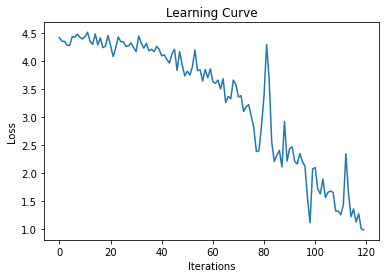

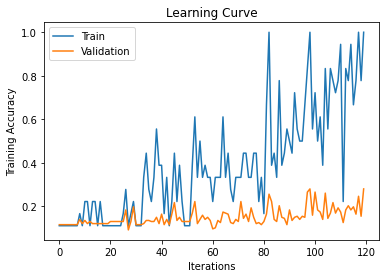

Overfit dataset accuracy after training :  1.000000 )


In [9]:
overfit_path = "/content/gdrive/My Drive/CSC413/new/" # edit me (This dataset contains 9 folders for the 9 labels and each folder contains 2 images)
overfit_data = torchvision.datasets.ImageFolder(overfit_path, transform=torchvision.transforms.ToTensor())

net2 = ConvolutionalNet()
train(net2, overfit_data, valid_data, batch_size=16, weight_decay=0.0, learning_rate=0.001, num_epochs=120)
acc = get_accuracy(net2, overfit_data)
print("Overfit dataset accuracy after training :  {0:f} )".format(acc))
    


## Question 4. Training

### Part (a) -- 5 points

Train your first network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

	Epoch 1
	[1,     8] loss: 2.525671
	[1,    16] loss: 2.373221
	cost      : 50.990986
	accuracy  : 19.6453%
	validation: 16.9082%

	Epoch 2
	[2,     8] loss: 2.490719
	[2,    16] loss: 2.330197
	cost      : 50.099705
	accuracy  : 15.2797%
	validation: 14.4928%

	Epoch 3
	[3,     8] loss: 2.447623
	[3,    16] loss: 2.287608
	cost      : 49.135280
	accuracy  : 17.1896%
	validation: 15.9420%

	Epoch 4
	[4,     8] loss: 2.381826
	[4,    16] loss: 2.218098
	cost      : 47.472899
	accuracy  : 35.6071%
	validation: 41.0628%

	Epoch 5
	[5,     8] loss: 2.236497
	[5,    16] loss: 2.090064
	cost      : 44.557898
	accuracy  : 30.8322%
	validation: 32.8502%

	Epoch 6
	[6,     8] loss: 2.084625
	[6,    16] loss: 1.928417
	cost      : 41.416914
	accuracy  : 44.2019%
	validation: 53.1401%

	Epoch 7
	[7,     8] loss: 1.876650
	[7,    16] loss: 1.727521
	cost      : 37.232851
	accuracy  : 45.5662%
	validation: 48.3092%

	Epoch 8
	[8,     8] loss: 1.643269
	[8,    16] loss: 1.604624
	cost      : 34.7155

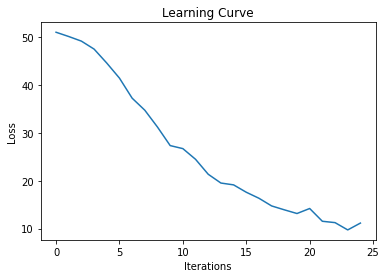

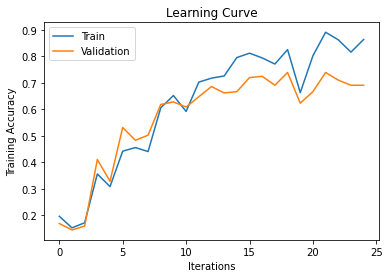

Accuracy after training : 0.863574 
Validation accuracy     : 0.690821 


In [14]:
# Your code goes here. Make sure to include the training curve.
net2 = ConvolutionalNet()
train(net2,train_data,valid_data,learning_rate=0.001,num_epochs=25,batch_size=32)
train_acc = get_accuracy(net2, train_data)
print("Accuracy after training : {0:f} ".format(train_acc))
valid_acc = get_accuracy(net2, valid_data)
print("Validation accuracy     : {0:f} ".format(valid_acc))

### Part (b) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (a).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

In [17]:
# To attain the perfect hyperparameters, I used 4 different learning rates (0.01, 0.001, and 0.0001. 
# I also experimented with different batch sizes as well to analyse the impact. 
# After closely examining the results, it lead me to believe that the batch size of 32 and the learning rate of 0.001 displays the most efficient learning curves. 
# One thing I noticed about for all of the learning rates is that when I increased the batch size, it lowered the intial cost which is the total running loss in that iteration. 
# With that being said, lowering the batch size to 16 caused higher costs and increasing the batch size to 64 caused a lower cost. 
# But to stay sufficient and to keep the training time optimized, we used our batch size as 32. 
# Also, when keeping the batch size 32 and just tuning the learning rate, we noticed that using 0.0001 caused the slowest learning progress and 0.01 was also slow but not slower then 0.0001. 
# When using 0.001 we got a learning progress that was moderate in comparison to 0.01 and 0.0001 where it was not too fast and not to slow. 
# Another key factor to mention is overfitting. 
# During my analysis, I noticed that with higher learning rates and higher batch sizes it is causing over fitting for example a batch size of 64 and learning rate of 0.01. 
# Not only that but it is also causing overfitting when a batch size is too small, for instance when the learning rate is 0.001 and the batch size is 16. 
# Therefore, using the learning rate 0.001 and batch size generated a nice learning curve. 
# Even though we notice a slight over fit near the last few epoches, they are not as significant as the curves that were trained with a different learning curve and a different batch size.

### Part (c) -- 5 points

Train your second network on your training set.
Plot the training curve, and include your plot in your writeup.

Make sure that you are checkpointing frequently!

	Epoch 1
	[1,     8] loss: 2.511779
	[1,    16] loss: 2.346348
	cost      : 50.488740
	accuracy  : 23.3288%
	validation: 28.0193%

	Epoch 2
	[2,     8] loss: 2.461708
	[2,    16] loss: 2.295397
	cost      : 49.459909
	accuracy  : 33.0150%
	validation: 35.2657%

	Epoch 3
	[3,     8] loss: 2.408483
	[3,    16] loss: 2.247809
	cost      : 48.314122
	accuracy  : 42.5648%
	validation: 40.5797%

	Epoch 4
	[4,     8] loss: 2.343307
	[4,    16] loss: 2.201663
	cost      : 47.415106
	accuracy  : 48.1583%
	validation: 41.5459%

	Epoch 5
	[5,     8] loss: 2.287839
	[5,    16] loss: 2.142587
	cost      : 46.186640
	accuracy  : 51.4325%
	validation: 47.8261%

	Epoch 6
	[6,     8] loss: 2.228505
	[6,    16] loss: 2.073351
	cost      : 44.842022
	accuracy  : 52.2510%
	validation: 52.1739%

	Epoch 7
	[7,     8] loss: 2.212971
	[7,    16] loss: 2.024697
	cost      : 43.251173
	accuracy  : 56.8895%
	validation: 57.9710%

	Epoch 8
	[8,     8] loss: 2.074284
	[8,    16] loss: 1.943640
	cost      : 41.6823

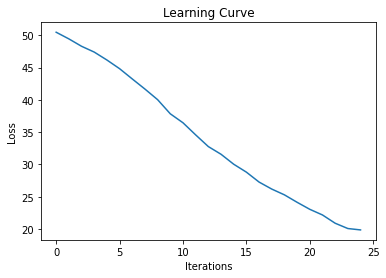

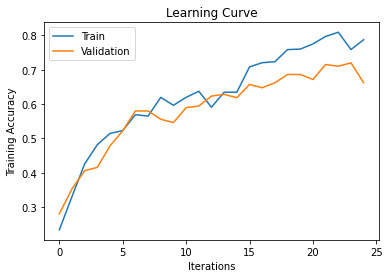

Accuracy after training : 0.787176 
Validation accuracy     : 0.661836 


In [9]:
# Your code goes here. Make sure to include the training curve.
nm_net = SecondConvolutionalNet()
train(nm_net,train_data,valid_data,learning_rate=0.0001,num_epochs=25,batch_size=32)
train_acc = get_accuracy(nm_net, train_data)
print("Accuracy after training : {0:f} ".format(train_acc))
valid_acc = get_accuracy(nm_net, valid_data)
print("Validation accuracy     : {0:f} ".format(valid_acc))

### Part (d) -- 2 points

You should have tried several hyperparameter choices before deciding on one set
of hyperparameters to use for Part (c).
In this section, briefly explain the hyperparamter choices that you tried, 
and how they impacted your training.

In [18]:
# To acheive the perfect learning curve, I first experimented with 4 different learning rates (0.1, 0.01, 0.001, and 0.0001) and 2 different batch sizes (16,32).
# We disqualified the learning rate 0.1 from our choices since it was generaitng high cost (loss function) and had an extremely slow learning progressing for both batch size 32 and 16.
# We notice that when we use a lower batch size the progress is faster than using a higher batch size despite the learning rate.
# Additonally, using a lower batch size also generated a higher cost in comparisons to the higher batch sizes.
# When using the learning rate 0.01 and 0.001, we noticed that for both the batch sizes the learning curve was significantly overfitting near the last few iterations.
# For the learning rate 0.0001 with the batch size 16 we not only noticed that it had a higher cost, but it was also overfitting signficantly. 
# Therefore, after these analysis, it led us to the conclusion to use the learning rate 0.0001 and the batch size 32 for this CNN.

### Part (e) -- 2 pts

Out of all the models (i.e. parts (a) vs (c), and the various hyperparameter choices)
that you tried, which model is the "best"?
If you were to select a single set of weight values (checkpoints)
to deploy and use in a real application, which would you choose?

In [19]:
# Out of all the models, I believe model in part(c) is the best with the hyper-parameter choice that we made.
# This is because batch normalization provides a better training progress that the model in part a).
# Additionally, after analyzing the data closely, for a single set of weight values, model in part c) updates the learning better.
# Not only is the curve more better, but also generates higher training accuracies.

## Question 5. Transfer Learning

For many image classification tasks, it is generally not a good idea to train a
very large deep neural network model from scratch due to the enormous compute
requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a
similar task to the one you need to solve. This method of using a
pre-trained network for other similar tasks is broadly termed
**Transfer Learning**. In this question, we will use Transfer Learning
to extract features from the hand gesture images. Then, train a smaller
network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, the AlexNet architecture played a pivotal role in
establishing Deep Neural Nets as a go-to tool for image classification
problems and we will use an ImageNet pre-trained AlexNet model to
extract features in this assignment.

### Part (a)

Here is the code to load the AlexNet network, with pretrained weights.
When you first run the code, PyTorch will download the pretrained weights
from the internet.

In [10]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The `alexnet` model is split up into two components: `alexnet.features` and 
`alexnet.classifier`.  The first neural network component, `alexnet.features`,
is used to
computed convolutional features, which is taken as input in `alexnet.classifier`.

The neural network `alexnet.features` expects an image tensor of shape
Nx3x224x224 as inputs and it will output a tensor of shape Nx256x6x6 . (N = batch size).

Here is an example code snippet showing how you can compute the AlexNet
features for some images (your actual code might be different):

In [11]:
img, label = train_data[0]
features = alexnet.features(img.unsqueeze(0)).detach()

Note that the `.detach()` at the end will be necessary in your code. The reason is that
PyTorch automatically builds computation graphs to be able to backpropagate
gradients. If we did not explicitly "detach" this tensor from the AlexNet portion
of the computation graph, PyTorch might try to backpropagate gradients to the AlexNet
weight and tune the AlexNet weights.

Compute the AlexNet features for each of your training, validation, and test data.
In other words, create three new arrays called `train_data_features`, `valid_data_features`
and `test_data_features`. Each of these arrays should contain tuples of the form 
`(alexnet_features, label)`

In [12]:
# Modify this code

train_data_features = []
valid_data_features = []
test_data_features = []

for img, y in train_data:
  features = alexnet.features((img.unsqueeze(0)).detach()) # compute the alex net features based on the image
  train_data_features.append((features,y),)



for img,y in valid_data:
  features = alexnet.features((img.unsqueeze(0)).detach())
  valid_data_features.append((features,y),)


for img,y in valid_data:
  features = alexnet.features((img.unsqueeze(0)).detach())
  test_data_features.append((features,y),)



### Part (b)


Create a multi-layer preceptron that
takes **as input** these AlexNet features,
and makes a prediction. Your model should be a subclass of `nn.Module`.

In [13]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(256 * 6 * 6, 256)

        self.layer2 = nn.Linear(256, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6)
        x = self.layer1(x) 
        x = self.layer2(x) 
        return x


### Part (c)

Train the `MLP()` model for at least 6 epochs, and report
on the maximum validation accuracy that you can attain.

This model should train *much* faster since it has very few parameters.
However, this model should attain much better accuracy much faster!

	Epoch 1
	[1,     8] loss: 1.887946
	[1,    16] loss: 1.250311
	cost      : 21.598319
	accuracy  : 84.4475%
	validation: 81.6425%

	Epoch 2
	[2,     8] loss: 0.245863
	[2,    16] loss: 0.173462
	cost      : 3.348794
	accuracy  : 96.4529%
	validation: 88.8889%

	Epoch 3
	[3,     8] loss: 0.109409
	[3,    16] loss: 0.098993
	cost      : 2.533995
	accuracy  : 99.7271%
	validation: 95.6522%

	Epoch 4
	[4,     8] loss: 0.037993
	[4,    16] loss: 0.037270
	cost      : 0.701301
	accuracy  : 99.7271%
	validation: 96.1353%

	Epoch 5
	[5,     8] loss: 0.019113
	[5,    16] loss: 0.015205
	cost      : 0.349608
	accuracy  : 100.0000%
	validation: 97.1014%

	Epoch 6
	[6,     8] loss: 0.008028
	[6,    16] loss: 0.010239
	cost      : 0.238778
	accuracy  : 100.0000%
	validation: 96.1353%

	Epoch 7
	[7,     8] loss: 0.009574
	[7,    16] loss: 0.008265
	cost      : 0.189105
	accuracy  : 100.0000%
	validation: 96.1353%



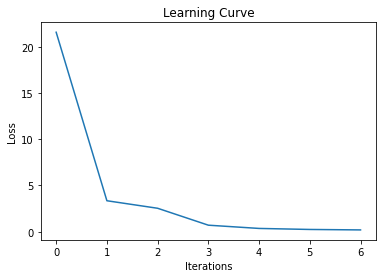

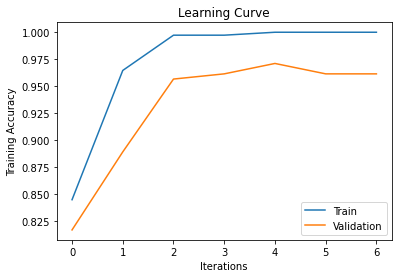

In [16]:
train_data_new = train_data_features
valid_data_new = valid_data_features
mlp = MLP()
train(mlp, train_data_new, valid_data_new,learning_rate=0.01)

In [ ]:
# The highest validation accuracy is acheived with the learning rate 0.01 and the accuracy is 96.1353%.

## Question 6. Test Accuracy

### Part (a) -- 5 pts

Report the test accuracies of your **single best** model for the test set, including
any model that you trained (including in Q5).

	Epoch 1
	[1,     8] loss: 2.518718
	[1,    16] loss: 2.354006
	cost      : 50.768860
	accuracy  : 16.3711%
	validation: 14.7982%

	Epoch 2
	[2,     8] loss: 2.504853
	[2,    16] loss: 2.335835
	cost      : 50.303644
	accuracy  : 23.8745%
	validation: 24.6637%

	Epoch 3
	[3,     8] loss: 2.474218
	[3,    16] loss: 2.306738
	cost      : 49.608676
	accuracy  : 17.3261%
	validation: 17.9372%

	Epoch 4
	[4,     8] loss: 2.451067
	[4,    16] loss: 2.268327
	cost      : 48.696073
	accuracy  : 27.8308%
	validation: 32.7354%

	Epoch 5
	[5,     8] loss: 2.339295
	[5,    16] loss: 2.176369
	cost      : 46.619627
	accuracy  : 31.1050%
	validation: 37.6682%

	Epoch 6
	[6,     8] loss: 2.196195
	[6,    16] loss: 2.048703
	cost      : 44.230967
	accuracy  : 40.3820%
	validation: 43.4978%

	Epoch 7
	[7,     8] loss: 2.044274
	[7,    16] loss: 1.942108
	cost      : 41.063135
	accuracy  : 50.3411%
	validation: 54.7085%

	Epoch 8
	[8,     8] loss: 1.881196
	[8,    16] loss: 1.750639
	cost      : 37.8662

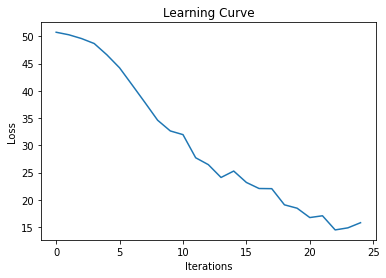

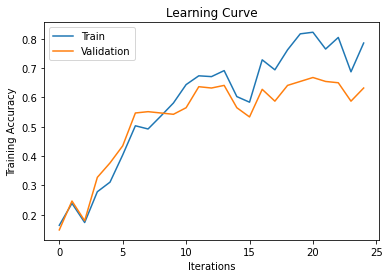

In [14]:
first_model = ConvolutionalNet()
train(first_model,train_data,test_data,learning_rate=0.001,batch_size=32,num_epochs=25)

In [70]:
# The test accuracy is 63.2287% for my signle-best model.

### Part (b) -- 1 pts

Display one image that your model correctly classified.

tensor([[-1.0556,  3.8007, -3.4578,  0.5776, -0.4240,  6.0743, -4.5332, -2.2011,
          0.3368]], grad_fn=<AddmmBackward0>) tensor([5])


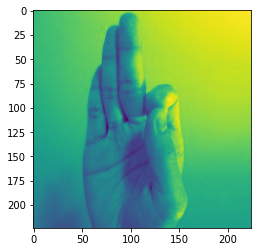

In [18]:
train_loader_batch = torch.utils.data.DataLoader(train_data, batch_size=1, shuffle=True)
for img,label in train_loader_batch:
  print(first_model(img),label)
  plt.imshow(img[0][1].detach())
  plt.show()
  break

### Part (b) -- 1 pts

Display one image that your model incorrectly classified. (If your test performance was 100%, please just say so.)

tensor([[ 4.3034,  1.3323,  0.5188,  2.2740, -1.0391, -2.4476, -1.5024, -3.4621,
         -0.1388]], grad_fn=<AddmmBackward0>) tensor([7])


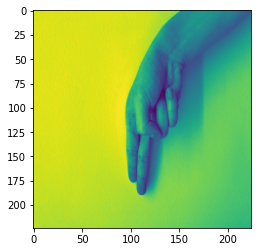

In [67]:
test_loader_batch = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)
for img,label in test_loader_batch:
  print(first_model(img),label)
  plt.imshow(img[0][1].detach())
  plt.show()
  break

In [ ]:
# The images are all being classified correctly. However, this image is in another angle.

## Question 6. Work Allocation -- 2 pts

This question is to make sure that if you are working with a partner, that
you and your partner contributed equally to the assignment.

Please have each team member write down the times that you worked on the
assignment, and your contribution to the assignment.

In [68]:
# Haoyang Li (Mac Li)
# Maria Abdul Karim
# 1a and 1b - Maria
# 1c and 1d - Mac

# collectively worked together for 2a and 2b
# 2c - Mac/Maria

# 3a - Collectively worked together
# 3b - Collectively worked together
# 3c - Mac 

# All of question 4, 5, and 6 - Maria